# Master 2 MVA

# Modèles stochastiques pour l'analyse d'images

# TV ICE - Espérance contionnelle itérée

#### Tamim EL AHMAD - elahmad.tamim@gmail.com

### Question 1 : 

Pour tout pixel $i$, on a :
$$\pi(u(i)|u(i^c))=\frac{\pi(u(i),u(i^c))}{\pi(u(i^c))}$$
Or :
$$
\pi(u(i),u(i^c))=\pi(u)=\frac{1}{Z'}e^{-\frac{1}{2\sigma^2}\|u-u_o\|^2}e^{-\lambda TV(u)}=\frac{1}{Z'}e^{-\frac{1}{2\sigma^2}\sum_{j\in\Omega}|u(j)-u_o(j)|^2}e^{-\frac{\lambda}{2}\sum_{j\in\Omega,j'\in\mathcal{N}(j)}|u(j)-u(j')|}
$$
Donc finalement : 
$$
\pi(u(i),u(i^c))=\frac{1}{Z'}e^{-\frac{1}{2\sigma^2}|u(i)-u_o(i)|^2}e^{-\frac{1}{2\sigma^2}\sum_{i'\neq i}|u(i')-u_o(i')|^2}e^{-\lambda\sum_{j\in\mathcal{N}(i)}|u(i)-u(j)|}e^{-\frac{\lambda}{2}\sum_{i'\neq i,j'\in\mathcal{N}(i'),j'\neq i'}|u(i')-u(j')|}
$$
Avec $Z'$ une constante de normalisation.
Le facteur devant $\sum_{j\in\mathcal{N}(i)}|u(i)-u(j)|$ devient $-\lambda$ et non $-\frac{\lambda}{2}$ car on compte une première fois la somme des différences entre le pixel $i$ et ses voisins en prenant le terme $i$ dans la somme sur $\Omega$ de la double somme et ensuite chacune de ces différences est comptée une seconde fois quand on prend chaque $j$ voisin de $i$ dans cette même somme.\
En outre :
$$
\pi(u(i^c))=\int_{\mathbb{R}}\pi(u)du_{|i}=\frac{1}{Z'}e^{-\frac{1}{2\sigma^2}\sum_{i'\neq i}|u(i')-u_o(i')|^2}e^{-\frac{\lambda}{2}\sum_{i'\neq i,j'\in\mathcal{N}(i'),j'\neq i'}|u(i')-u(j')|}\int_{\mathbb{R}}e^{-\frac{1}{2\sigma^2}|s-u_o(i)|^2}e^{-\lambda\sum_{j\in\mathcal{N}(i)}|s-u(j)|}ds
$$
On obtient donc bien : 
$$
\pi(u(i)|u(i^c))=\frac{1}{Z}e^{-\frac{1}{2\sigma^2}|u(i)-u_o(i)|^2}e^{-\lambda\sum_{j\in\mathcal{N}(i)}|u(i)-u(j)|}
$$
Avec $Z=\int_{\mathbb{R}}e^{-\frac{1}{2\sigma^2}|s-u_o(i)|^2}e^{-\lambda\sum_{j\in\mathcal{N}(i)}|s-u(j)|}ds$

### Question 2 : 

Pour toute image $\omega$ de même taille que $u_o$ et pour tout pixel $i$ :
$$
\mathbb{E}_{U\sim \pi}[U(i)|U(i^c)=\omega(i^c)]=\int_{\mathbb{R}}s\pi(s|\omega(i^c))ds=\frac{\int_{\mathbb{R}}se^{-\frac{1}{2\sigma^2}|s-u_o(i)|^2}e^{-\lambda\sum_{j\in\mathcal{N}(i)}|s-\omega(j)|}ds}{\int_{\mathbb{R}}e^{-\frac{1}{2\sigma^2}|s-u_o(i)|^2}e^{-\lambda\sum_{j\in\mathcal{N}(i)}|s-\omega(j)|}ds}
$$
En effectuant le changement de variable $s=s-u_o(i)$, on obtient :
$$
\mathbb{E}_{U\sim \pi}[U(i)|U(i^c)=\omega(i^c)]=\frac{\int_{\mathbb{R}}(s+u_o(i))e^{-\frac{1}{2\sigma^2}s^2}e^{-\lambda\sum_{j\in\mathcal{N}(i)}|s+u_o(i)-\omega(j)|}ds}{\int_{\mathbb{R}}e^{-\frac{1}{2\sigma^2}s^2}e^{-\lambda\sum_{j\in\mathcal{N}(i)}|s+u_o(i)-\omega(j)|}ds}=\frac{u_o(i)\int_{\mathbb{R}}e^{-\frac{1}{2\sigma^2}s^2}e^{-\lambda\sum_{j\in\mathcal{N}(i)}|s+u_o(i)-\omega(j)|}ds+\int_{\mathbb{R}}se^{-\frac{1}{2\sigma^2}s^2}e^{-\lambda\sum_{j\in\mathcal{N}(i)}|s+u_o(i)-\omega(j)|}ds}{\int_{\mathbb{R}}e^{-\frac{1}{2\sigma^2}s^2}e^{-\lambda\sum_{j\in\mathcal{N}(i)}|s+u_o(i)-\omega(j)|}ds}
$$
Finalement, on obtient bien :
$$
\mathbb{E}_{U\sim \pi}[U(i)|U(i^c)=\omega(i^c)]=u_o(i)+\frac{1}{Z}\int_{\mathbb{R}}se^{-\frac{1}{2\sigma^2}s^2}e^{-\lambda\sum_{j\in\mathcal{N}(i)}|s+u_o(i)-\omega(j)|}ds
$$
Avec $Z=\int_{\mathbb{R}}e^{-\frac{1}{2\sigma^2}s^2}e^{-\lambda\sum_{j\in\mathcal{N}(i)}|s+u_o(i)-\omega(j)|}ds$

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from TVL2 import *
#from TVICE import *
import warnings 
warnings.filterwarnings('ignore')

# TV - Iterated Conditional Expectation

Ce notebook porte sur le débruitage d'images grâce à l'algorithme *Iterated Conditional Expectation*. Il est inspiré de l'article

[Louchet, C.,  Moisan, L., *Total variation denoising using iterated conditional expectation*. In 2014 22nd European Signal Processing Conference (EUSIPCO) (pp. 1592-1596). 2014](https://hal.archives-ouvertes.fr/hal-01214735)

Voir le sujet PDF associé pour plus de détails.

In [100]:
lambd = 20     # TV regularization parameter 
sig = 0.05  # noise standard deviation
n_iter = 50

In [101]:
# image creation
n = 100    # start with small images for your experimentations
i = 100
u = plt.imread('../im/simpson512.png')
u = u[:,:,1]
u = u[i:i+n,i:i+n]
nr,nc = u.shape

# add noise
ub = u + sig*np.random.randn(nr,nc)
noise = np.random.rand(nr,nc)

# TV-MAP
u_tvmap = chambolle_pock_prox_TV1(ub,sig**2*lambd,n_iter)

In [102]:
def logerfc(t):
#
# out = logerfc(t): compute an accurate a estimate of log(erfc(t))
#

    out = np.zeros(t.shape) 
    id = t < 20.
    out[id] = np.log(scipy.special.erfc(t[id])) 
    
    c = np.cumprod(np.arange(1,16,2)/2) 
    t2n0 = t[id==0]**2
    t2n = np.copy(t2n0) 
    S = np.ones((t2n.size,)) 
    
    p = -1
    for n in range(8):
        S = S + (p * c[n]) / t2n 
        t2n = t2n*t2n0 
        p = -p 
    out[id==0] = -t2n0 + np.log(S/(t[id==0]*np.sqrt(np.pi))) 
    return out


def logerf2(a,b):
    #
    # usage: out = logerf2(a,b) with a < b
    # computes an accurate estimate of log(erf(b)-erf(a))

    a0 = np.copy(a)
    id = (b < 0)
    a[id] = -b[id]
    b[id] = -a0[id]

    out = np.zeros(a.shape) 
    id1 = (b-a)/(np.abs(a)+np.abs(b)) < 1e-14 
    out[id1] = np.log(2*(b[id1]-a[id1])/np.sqrt(np.pi)) - b[id1]**2 

    id2 = (id1==0) & (a<1) 
    out[id2] = np.log(scipy.special.erf(b[id2])-scipy.special.erf(a[id2])) 

    id3 = (id1==0) & (id2==0) 
    m = logerfc(b[id3]) 
    out[id3] = m + np.log(np.expm1(logerfc(a[id3])-m)) 
    
    return out

### Question 3

Comme expliqué dans le papier de C. Louchet et L. Moisan, on passe au $log$ pour éviter les problèmes de soupassement ou dépassement arithmétique (underflow et overflow) puisqu'on manipule ici des réels allant de 0 à 255, et qui peuvent donc être extrêment petits en appliquant directement erfc par exemple. Un exemple ci-dessous.

In [103]:
example = np.asarray([30])

print(logerfc(example))
print('logerfc(30) donne environ -900.')

print(np.exp(logerfc(example)))
print('Python représente 10')

[-903.97411208]
logerfc(30) donne environ -900.
[0.]
Python représente 10


$logerfc(30)\approx -9OO$ et Python représente $exp(-900)$ par $0$.

C'est pourquoi on retranche à chaque $X_k$ le maximum d'entre eux, c'est la valeur permettant le mieux d'éviter l'overflow.

On peut se le permettre car :

$$
\frac{2X_{-2}'+X_{-1}'-X_{1}'-2X_{2}'}{X_{-2}'+X_{-1}'+X_{0}'+X_{1}'+X_{2}'}=\frac{2exp(log(X_{-2})-M)+exp(log(X_{-1})-M)-exp(log(X_{1})-M)-2exp(log(X_{2})-M)}{exp(log(X_{-2})-M)+exp(log(X_{-1})-M)+exp(log(X_{0})-M)+exp(log(X_{1})-M)+exp(log(X_{2})-M)}=\frac{2X_{-2}exp(-M)+X_{-1}exp(-M)-X_{1}exp(-M)-2X_{2}exp(-M)}{X_{-2}exp(-M)+X_{-1}exp(-M)+X_{0}exp(-M)+X_{1}exp(-M)+X_{2}exp(-M)}
$$

Finalement, on a bien :

$$
\frac{2X_{-2}'+X_{-1}'-X_{1}'-2X_{2}'}{X_{-2}'+X_{-1}'+X_{0}'+X_{1}'+X_{2}'}=\frac{2X_{-2}+X_{-1}-X_{1}-2X_{2}}{X_{-2}+X_{-1}+X_{0}+X_{1}+X_{2}}
$$

### Question 4

In [104]:
def neighbors(u):
    # usage: out = neighbors(u)
    # (u.shape[0],u.shape[1],4) numpy array with at each out[i,j,:] the 4-length numpy array of ordered neighbors of u[i,j]
    # for each pixel i on the edges, its neighbors outside the picture is itself
    
    out = np.zeros((u.shape[0],u.shape[1],4))
    
    out[:,:,0] = np.roll(u,1,axis=0)
    out[0,:,0] = u[0,:]
    
    out[:,:,1] = np.roll(u,-1,axis=0)
    out[-1,:,1] = u[-1,:]
    
    out[:,:,2] = np.roll(u,1,axis=1)
    out[:,0,2] = u[:,0]
    
    out[:,:,3] = np.roll(u,-1,axis=1)
    out[:,-1,3] = u[:,-1]
    
    out = np.sort(out, axis=2)
    
    return out

def logX_k(u, neighb, sig, lambd):
    # usage: out = logX_k(u, neighb)
    # (u.shape[0],u.shape[1],5) numpy array with the values of log(X_k) for k=-2 to 2 of all pixels
    
  out = np.zeros((u.shape[0],u.shape[1],5))

  denom = sig*np.sqrt(2)

  a, b, c, d = neighb[:,:,0], neighb[:,:,1], neighb[:,:,2], neighb[:,:,3]

  out[:, :, 0] = logerfc((u - a + 4*lambd*sig**2)/denom) + 2*lambd*(2*(u + 2*lambd*sig**2) - a - b)
  
  out[:, :, 1] = logerf2((a-u-2*lambd*sig**2)/denom, (b-u-2*lambd*sig**2)/denom) + lambd*(2*(u-b) + 2*lambd*sig**2)

  out[:, :, 2] = logerf2((b-u)/denom,(c-u)/denom)

  out[:, :, 3] = logerf2((c-u+2*lambd*sig**2)/denom, (d-u+2*lambd*sig**2)/denom) + lambd*(2*(c-u) + 2*lambd*sig**2)
        
  out[:, :, 4] = logerfc((d - u + 4*lambd*sig**2)/denom) + 2*lambd*(c + d -2*(u - 2*lambd*sig**2))
  
  return out

def tvice(u0,sig,lambd,niter): 
    # usage: out = tvice(u0,sigma,lambda,niter) 
    # TV-ICE denoising algorithm (vectorized version)

    u = np.copy(u0)
    
    u_k = [u]
        
    for k in range(niter):
        
        neighb = neighbors(u)
        
        X_k = logX_k(u0, neighb, sig, lambd)
        
        M = np.amax(X_k, axis=2)
        
        X_k[:,:,0] = np.exp(X_k[:,:,0] - M)
        X_k[:,:,1] = np.exp(X_k[:,:,1] - M)
        X_k[:,:,2] = np.exp(X_k[:,:,2] - M)
        X_k[:,:,3] = np.exp(X_k[:,:,3] - M)
        X_k[:,:,4] = np.exp(X_k[:,:,4] - M)
        
        u = u0 + 2*lambd*sig**2*((2*X_k[:,:,0]+X_k[:,:,1]-X_k[:,:,3]-2*X_k[:,:,4])/(np.sum(X_k,axis=2)))
        
        u_k.append(u)
    
    return u, u_k

### Question 5

<Figure size 720x720 with 0 Axes>

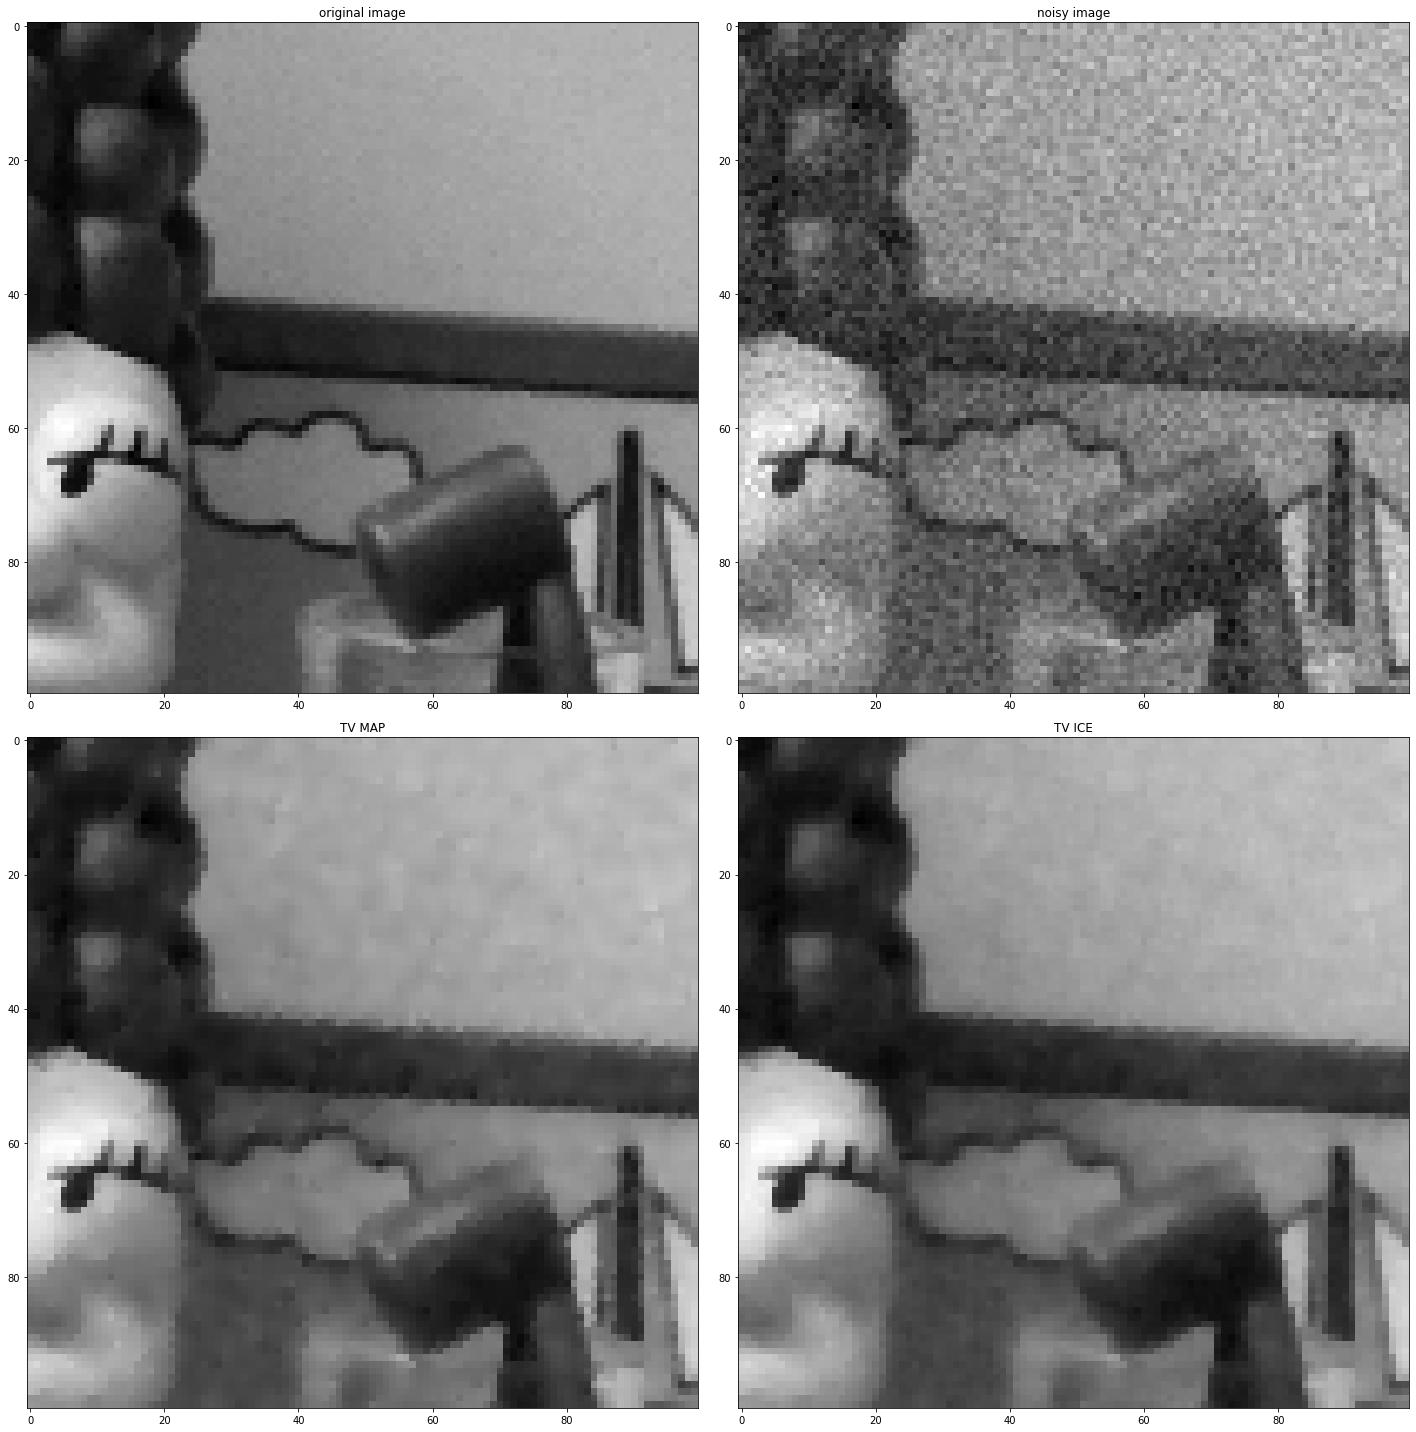

<Figure size 720x720 with 0 Axes>

In [105]:
## denoise ub using the TV-ICE scheme
out, u_k = tvice(ub,sig,lambd,n_iter)

## display
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes[0,0].imshow(u,cmap='gray')
axes[0,0].set_title('original image')
axes[0,1].imshow(ub,cmap='gray')
axes[0,1].set_title('noisy image')
axes[1,0].imshow(u_tvmap,cmap='gray')
axes[1,0].set_title('TV MAP')
axes[1,1].imshow(out,cmap='gray')
axes[1,1].set_title('TV ICE')
fig.tight_layout()
plt.figure(figsize = (10,10))

On constate d'abord qualitativement que l'on obtient de bons résultats en débruitage assez similaires pour le MAP, obtenu avec la méthode de Chambolle-Pock, et TV ICE sur cette image, bien que l'image débruitée obtenue présente un léger effet de flou par rapport à la vraie image.

On peut comparer la norme 2 de la différence entre la vraie image et l'image débruitée par chaque méthode :

In [106]:
print("L'erreur en norme 2 pour MAP avec la méthode de Chambolle-Pock :" + str(np.linalg.norm(u-u_tvmap)))

print("L'erreur en norme 2 pour la méthode TV ICE :" + str(np.linalg.norm(u-out)))

L'erreur en norme 2 pour MAP avec la méthode de Chambolle-Pock :2.4658328272283603
L'erreur en norme 2 pour la méthode TV ICE :2.612873625995654


Les résultats par cette métrique sont très similaires, la méthode de Chambolle-Pock est très légérement meilleure.

On peut effectuer la même comparaison avec la méthode d'évaluation de débruitage PSNR, mesurant la qualité de reconstruction de l'image d'origine:

In [107]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

print("Le PSNR appliquée à la vraie image (référence) :" + str(psnr(u,u)))

print("Le PSNR pour MAP avec la méthode de Chambolle-Pock :" + str(psnr(u,u_tvmap)))

print("Le PSNR pour la méthode TV ICE :" + str(psnr(u,out)))

Le PSNR appliquée à la vraie image (référence) :100
Le PSNR pour MAP avec la méthode de Chambolle-Pock :80.29153100917219
Le PSNR pour la méthode TV ICE :79.78843550490923


Ici encore, Les résultats par cette métrique sont très similaires, et la méthode de Chambolle-Pock est très légérement meilleure.

Enfin, on peut effectuer la même comparaison avec la méthode d'évaluation de débruitage SSIM, mesurant la similarité de structure entre deux images:

In [108]:
from skimage import measure

print("Le SSIM appliquée à la vraie image (référence) :" + str(measure.compare_ssim(u, u, data_range=u.max() - u.min())))

print("Le SSIM pour MAP avec la méthode de Chambolle-Pock :" + str(measure.compare_ssim(u, u_tvmap, data_range=u_tvmap.max() - u_tvmap.min())))

print("Le SSIM pour la méthode TV ICE :" + str(measure.compare_ssim(u, out, data_range=out.max() - out.min())))

Le SSIM appliquée à la vraie image (référence) :1.0
Le SSIM pour MAP avec la méthode de Chambolle-Pock :0.8713419890898435
Le SSIM pour la méthode TV ICE :0.8704130475347067


Ici encore, Les résultats par cette métrique sont très similaires, et la méthode de Chambolle-Pock est très légérement meilleure.

## Test sur l'image entière

<Figure size 720x720 with 0 Axes>

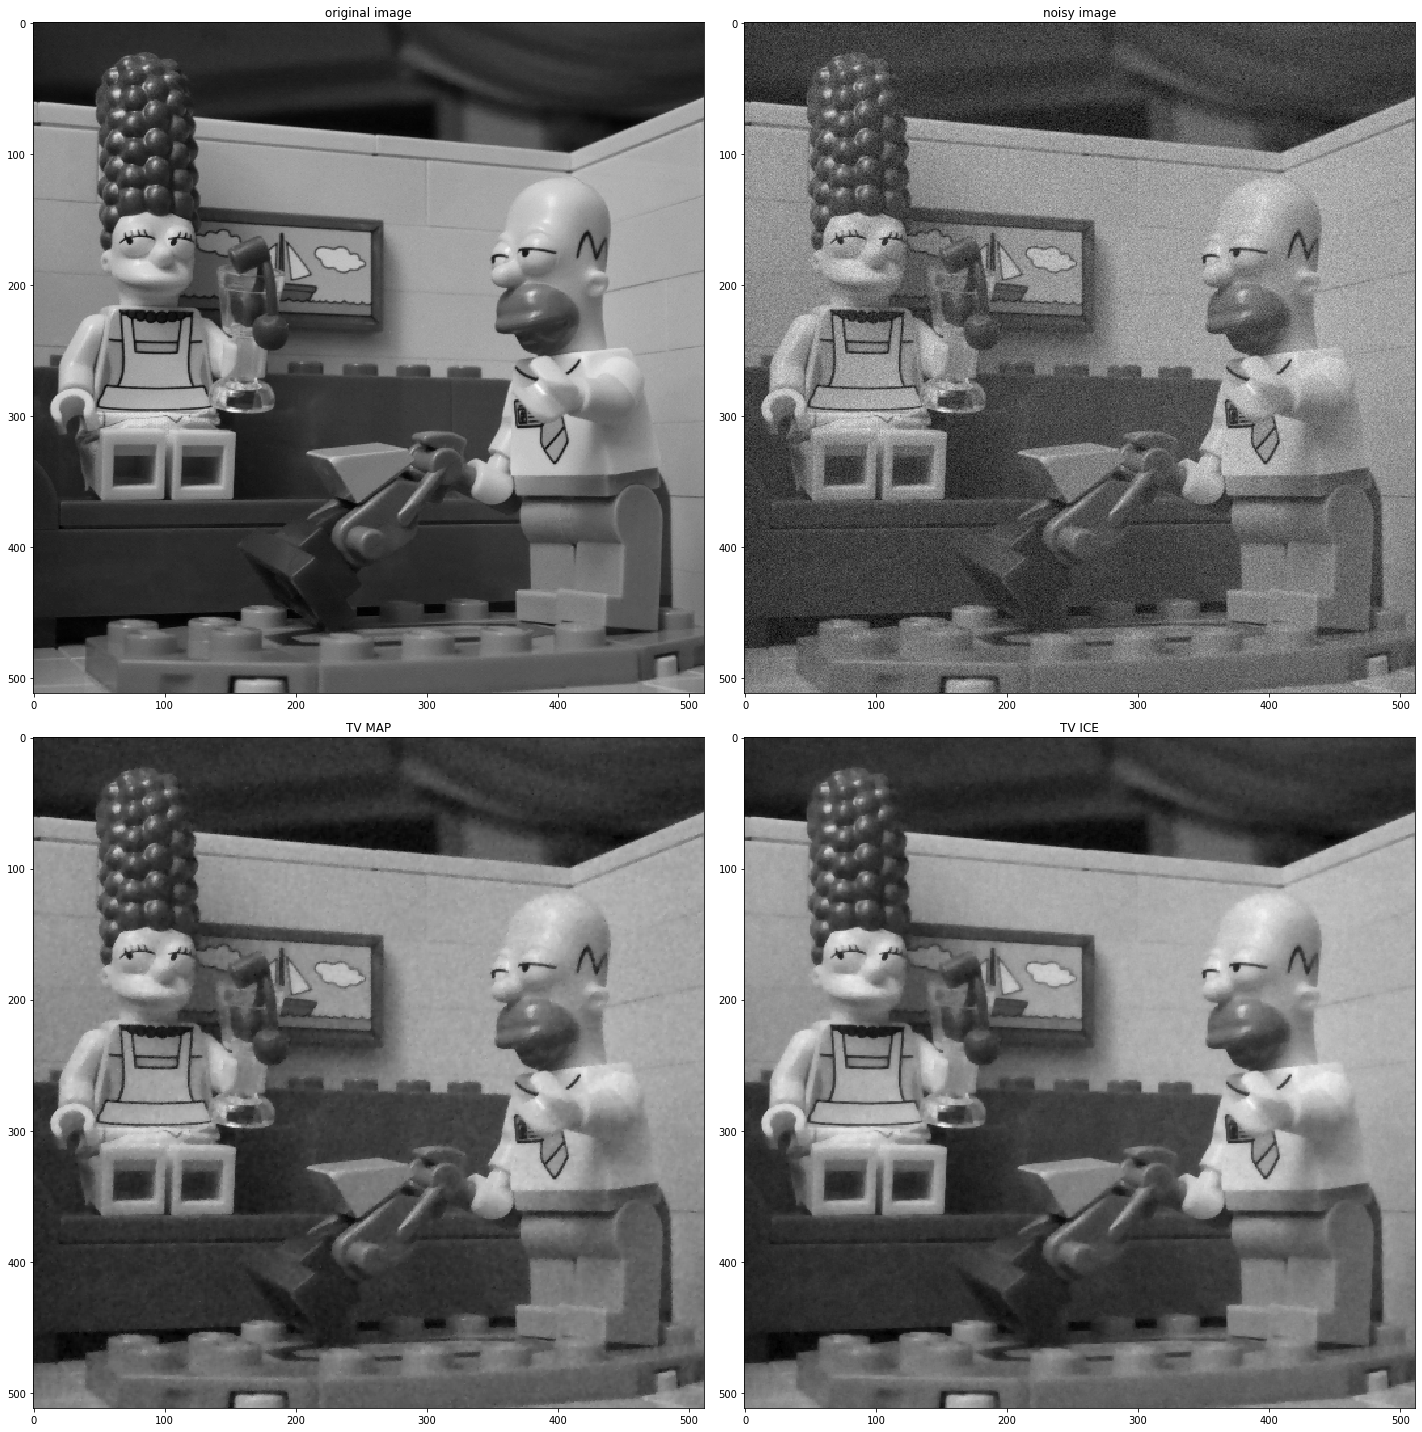

<Figure size 720x720 with 0 Axes>

In [109]:
# image creation
u_full = plt.imread('../im/simpson512.png')
u_full = u_full[:,:,1]
nr_full,nc_full = u_full.shape

# add noise
ub_full = u_full + sig*np.random.randn(nr_full,nc_full)
noise_full = np.random.rand(nr_full,nc_full)

# TV-MAP
u_tvmap_full = chambolle_pock_prox_TV1(ub_full,sig**2*lambd,n_iter)

## denoise ub using the TV-ICE scheme
out_full, u_k_full = tvice(ub_full,sig,lambd,n_iter)

## display
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes[0,0].imshow(u_full,cmap='gray')
axes[0,0].set_title('original image')
axes[0,1].imshow(ub_full,cmap='gray')
axes[0,1].set_title('noisy image')
axes[1,0].imshow(u_tvmap_full,cmap='gray')
axes[1,0].set_title('TV MAP')
axes[1,1].imshow(out_full,cmap='gray')
axes[1,1].set_title('TV ICE')
fig.tight_layout()
plt.figure(figsize = (10,10))

In [110]:
print("L'erreur en norme 2 pour MAP avec la méthode de Chambolle-Pock :" + str(np.linalg.norm(u_full-u_tvmap_full)))
print("L'erreur en norme 2 pour la méthode TV ICE :" + str(np.linalg.norm(u_full-out_full)))

print("Le PSNR pour MAP avec la méthode de Chambolle-Pock :" + str(psnr(u_full,u_tvmap_full)))
print("Le PSNR pour la méthode TV ICE :" + str(psnr(u_full,out_full)))

print("Le SSIM pour MAP avec la méthode de Chambolle-Pock :" + str(measure.compare_ssim(u_full, u_tvmap_full, data_range=u_tvmap_full.max() - u_tvmap_full.min())))
print("Le SSIM pour la méthode TV ICE :" + str(measure.compare_ssim(u, out, data_range=out_full.max() - out_full.min())))

L'erreur en norme 2 pour MAP avec la méthode de Chambolle-Pock :10.584458305822096
L'erreur en norme 2 pour la méthode TV ICE :10.771764583454647
Le PSNR pour MAP avec la méthode de Chambolle-Pock :81.82283009844602
Le PSNR pour la méthode TV ICE :81.67046576115192
Le SSIM pour MAP avec la méthode de Chambolle-Pock :0.890705546249626
Le SSIM pour la méthode TV ICE :0.8959831879082638


Ici encore, Les résultats sont très similaires, aussi bien qualitativement que quantitativement, et la méthode de Chambolle-Pock est très légérement meilleure selon les 3 métriques utilisées.

### Question 6

Text(0.5, 1.0, 'Vitesse de convergence des itérés vers leur limite')

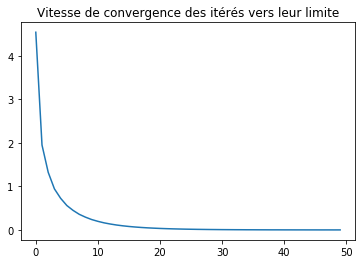

In [111]:
conv = []

for i in range(n_iter):
    conv.append(np.linalg.norm(u_k[i] - out))

plt.plot(conv)
plt.title('Vitesse de convergence des itérés vers leur limite')

α is : 0.8376188377809053


Text(0.5, 1.0, 'log de la convergence des itérés vers leur limite pour mettre en évidence la pente log(α)')

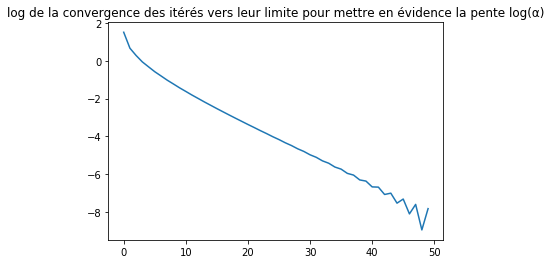

In [112]:
from scipy import stats

log_conv = np.log(np.asarray(conv))

slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(n_iter),log_conv)

print('α is : ' + str(np.exp(slope)))

plt.plot(log_conv)
plt.title('log de la convergence des itérés vers leur limite pour mettre en évidence la pente log(α)')